## Непараметрические критерии

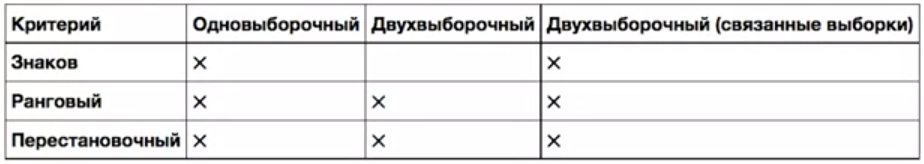

In [1]:
import numpy as np
import pandas as pd
import itertools
from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mouses_data = pd.read_csv("data/mirror_mouses.txt", header=None, names=["proportion_of_time"])

In [4]:
mouses_data.head()

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444


In [5]:
mouses_data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


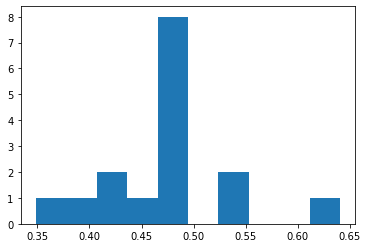

In [6]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

### Одновыборочые критерии

In [7]:
zconfint(mouses_data)

(array([0.44291783]), array([0.50765996]))

#### Критерий знаков
H0: median = .5  
H1: median != .5

In [8]:
sign_test(mouses_data, .5)

(-5.0, 0.021270751953125)

#### Критерий знаковых рангов Вилкокса

In [9]:
m0 = .5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.09344482421875)

#### Перестановочный критерий

In [10]:
def permutation_t_stat_1sample(sample, mean):
    t_stat = sum([x - mean for x in sample])
    return t_stat

In [11]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, .5)

-0.39537769999999994

In [16]:
def permutation_zero_distr_1sample(sample, mean, max_permutation=None):
    centered_sample = [x - mean for x in sample]
    if max_permutation:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size=(max_permutation, len(sample))) - 1])
    else:
        signs_array = itertools.product([-1, 1], repeat=len(sample))
    distr = [sum(centered_sample * np.array(sign)) for sign in signs_array]
    return distr

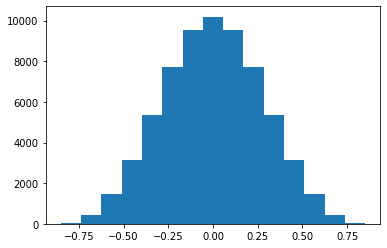

In [17]:
pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, .5), bins=15)
pylab.show()

In [20]:
def permutation_test(sample, mean, max_permutation=None, alternative="two-sided"):
    if alternative not in ("two-sided", "less", "greater"):
        raise ValueError("alternative not recognized\nshould be 'two-sided', 'less' or 'greater'")
    t_stat = permutation_t_stat_1sample(sample, mean)
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutation)
    if alternative == 'two-sided':
        return sum([1 if abs(x) >= abs(t_stat) else 0 for x in zero_distr]) / len(zero_distr)
    if alternative == 'less':
        return sum([1 if x <= t_stat else 0 for x in zero_distr]) / len(zero_distr)
    if alternative == 'greater':
        return sum([1 if x >= t_stat else 0 for x in zero_distr]) / len(zero_distr)

In [21]:
permutation_test(mouses_data.proportion_of_time, .5)

0.15777587890625

In [23]:
permutation_test(mouses_data.proportion_of_time, .5, 10000)

0.1631993101218066